# Assignment: Descriptive Analytics and Data Preprocessing
## Dataset: Sales Data with Discounts

In this assignment, we analyze and preprocess a sales dataset using descriptive statistics, visualizations, standardization, and one-hot encoding to prepare the data for future analysis or machine learning tasks.

## 1. Import Libraries and Load Dataset

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("sales_data_with_discounts.csv")
df.head()


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


## 2. Identify Numerical and Categorical Columns

In [10]:

numerical_cols = df.select_dtypes(include='number').columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)


Numerical columns: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']
Categorical columns: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


## 3. Descriptive Statistics

In [3]:

for col in numerical_cols:
    print(f"\nStatistics for {col}:")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Mode: {df[col].mode()[0]}")
    print(f"Standard Deviation: {df[col].std()}")



Statistics for Volume:
Mean: 5.066666666666666
Median: 4.0
Mode: 3
Standard Deviation: 4.231602391213926

Statistics for Avg Price:
Mean: 10453.433333333332
Median: 1450.0
Mode: 400
Standard Deviation: 18079.90483993645

Statistics for Total Sales Value:
Mean: 33812.83555555555
Median: 5700.0
Mode: 24300
Standard Deviation: 50535.07417255328

Statistics for Discount Rate (%):
Mean: 15.155241895330914
Median: 16.57776564929597
Mode: 5.007822189204133
Standard Deviation: 4.220602153325511

Statistics for Discount Amount:
Mean: 3346.499424342415
Median: 988.9337332382784
Mode: 69.17794228822787
Standard Deviation: 4509.9029633539985

Statistics for Net Sales Value:
Mean: 30466.336131270138
Median: 4677.788059301853
Mode: 326.97480055470817
Standard Deviation: 46358.656624066934


## 4. Data Visualization

### 4.1 Histograms

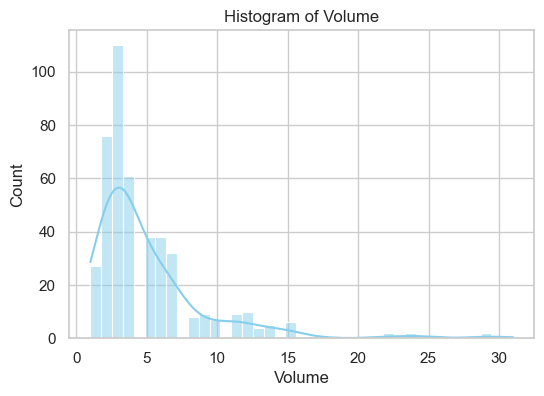

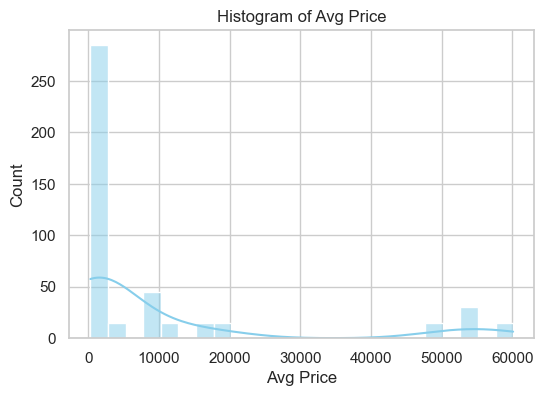

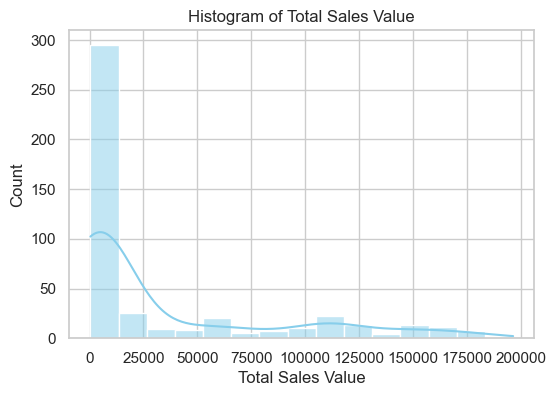

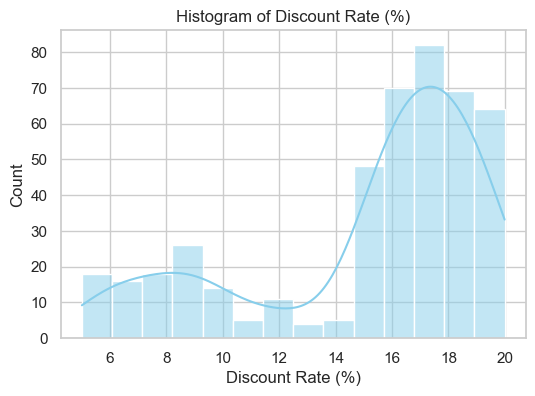

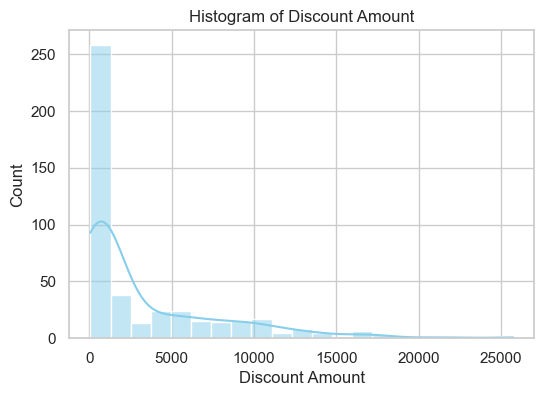

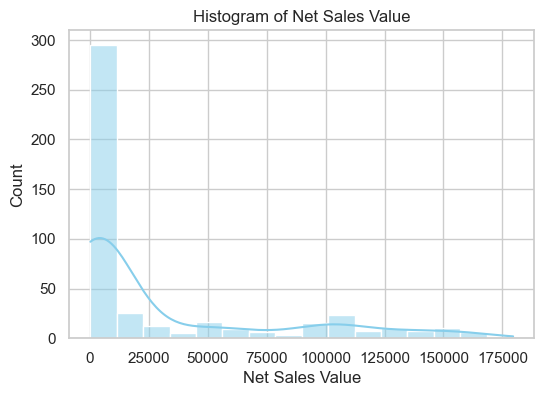

In [4]:

sns.set(style="whitegrid")
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Histogram of {col}")
    plt.show()


### 4.2 Boxplots

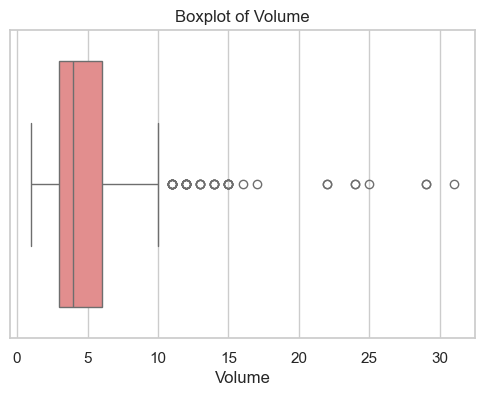

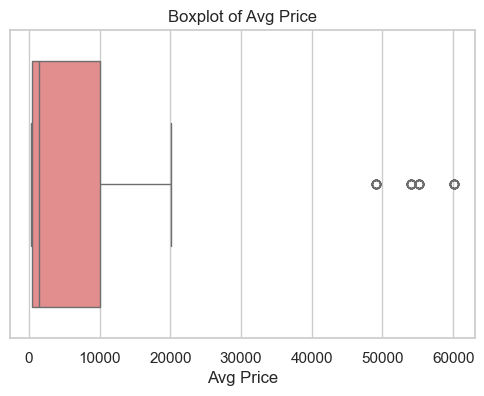

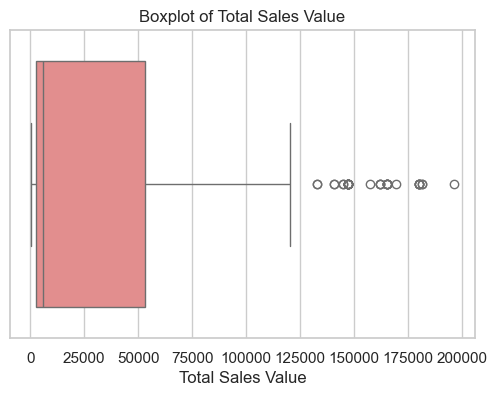

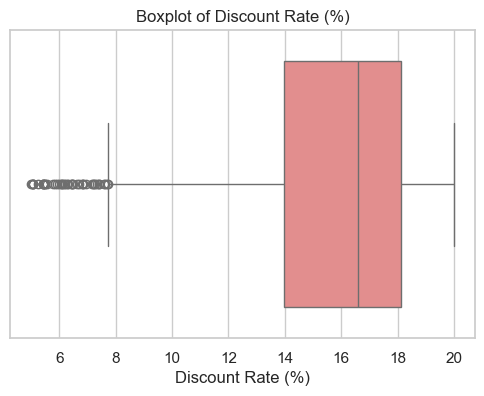

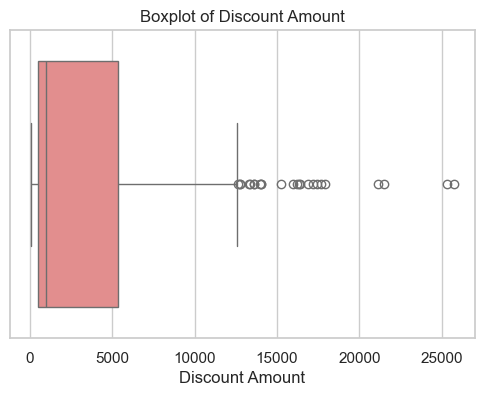

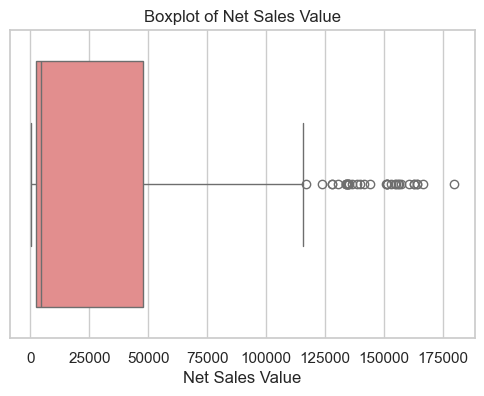

In [5]:

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f"Boxplot of {col}")
    plt.show()


### 4.3 Bar Charts for Categorical Columns

C:\Users\Dell\AppData\Local\Temp\ipykernel_18872\671480242.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


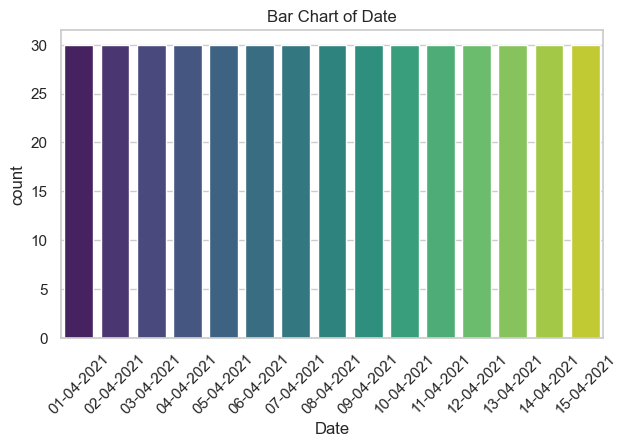

C:\Users\Dell\AppData\Local\Temp\ipykernel_18872\671480242.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


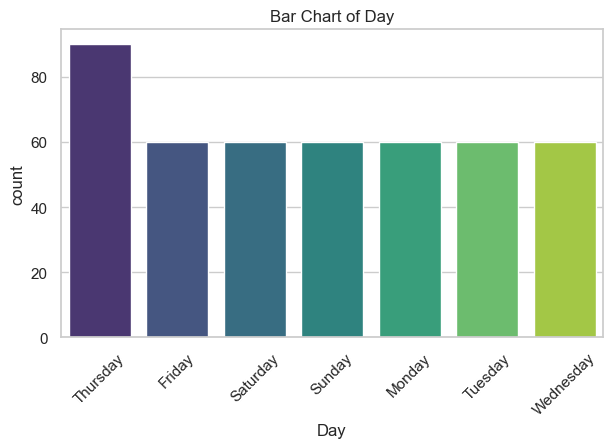

C:\Users\Dell\AppData\Local\Temp\ipykernel_18872\671480242.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


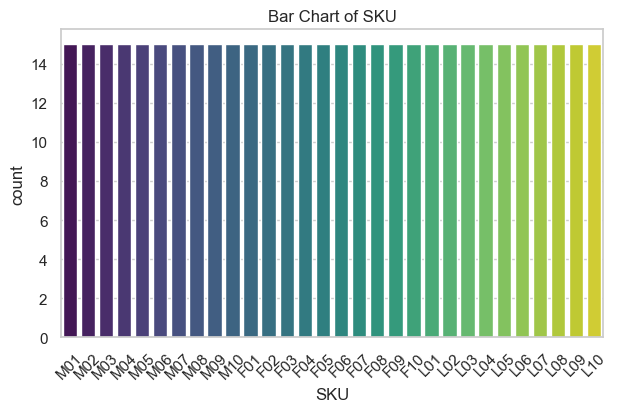

C:\Users\Dell\AppData\Local\Temp\ipykernel_18872\671480242.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


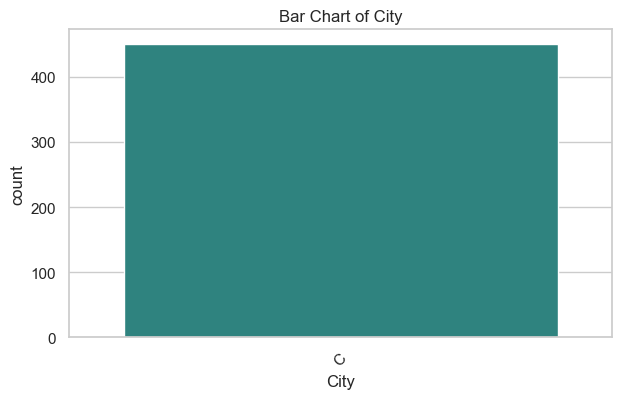

C:\Users\Dell\AppData\Local\Temp\ipykernel_18872\671480242.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


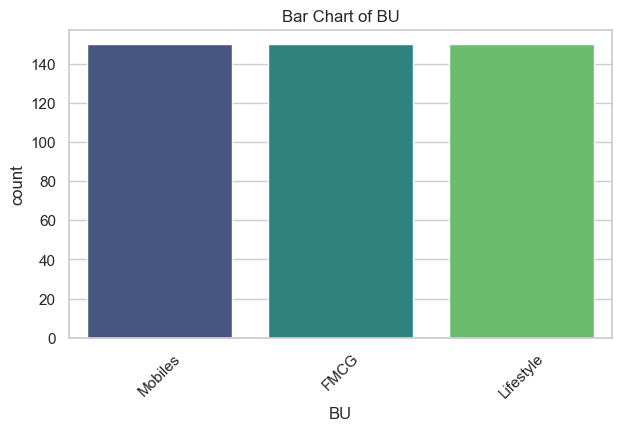

C:\Users\Dell\AppData\Local\Temp\ipykernel_18872\671480242.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


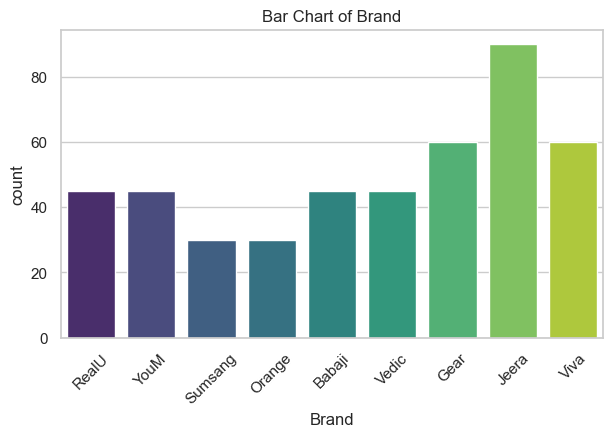

C:\Users\Dell\AppData\Local\Temp\ipykernel_18872\671480242.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


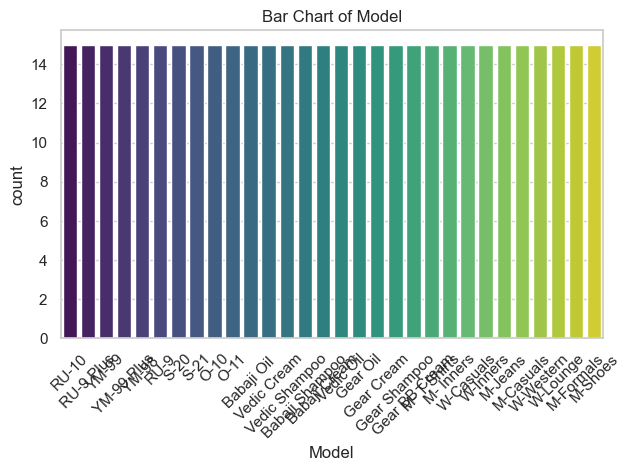

In [6]:

for col in categorical_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(x=df[col], palette='viridis')
    plt.title(f"Bar Chart of {col}")
    plt.xticks(rotation=45)
    plt.show()


## 5. Standardization (Z-score Normalization)

In [7]:

scaler = StandardScaler()
standardized_data = scaler.fit_transform(df[numerical_cols])
standardized_df = pd.DataFrame(standardized_data, columns=numerical_cols)
standardized_df.head()


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595


### Optional: Compare Original vs. Standardized

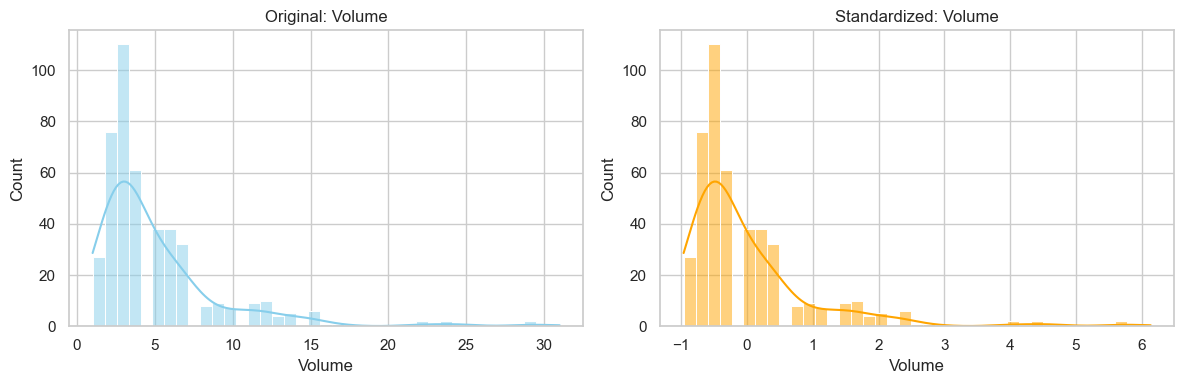

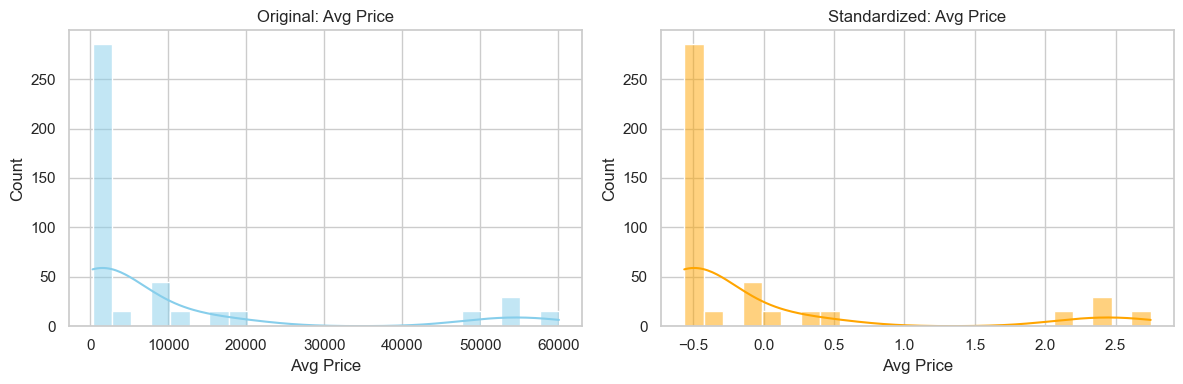

In [8]:

for col in numerical_cols[:2]:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f"Original: {col}")
    
    sns.histplot(standardized_df[col], kde=True, ax=axes[1], color='orange')
    axes[1].set_title(f"Standardized: {col}")
    
    plt.tight_layout()
    plt.show()


## 6. One-Hot Encoding (Dummy Variables)

In [9]:

df_encoded = pd.get_dummies(df, columns=categorical_cols)
df_encoded.head()


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## ✅ Conclusion

- We computed descriptive statistics like mean, median, and standard deviation for numerical columns.
- Visualizations such as histograms and boxplots revealed patterns, outliers, and skewed distributions.
- Categorical variables were analyzed using bar charts to explore frequency distribution.
- Standardization was applied to numerical data using z-score normalization to make them scale-compatible.
- One-hot encoding was applied to transform categorical features into numerical format for modeling.

These preprocessing steps are essential to prepare data for machine learning models and ensure they perform reliably and fairly.